In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st    

In [2]:
def qubic_spline_coeff(x_nodes, y_nodes):
    N = len(x_nodes)
    A = [[0] * N for i in range (0,N)]
    A[0][0] = 1
    A[N-1][N-1] = 1
    a = [y_nodes[i] for i in range(0, N)]
    h = np.array([x_nodes[i + 1] - x_nodes[i] for i in range(0, N-1)])
    b = np.array([0] + [((3 / h[i] * (a[i + 1] - a[i]) - (3 / h[i - 1] * (a[i] - a[i - 1])))) for i in range (1, N-1)] + [0])
    for i in range (1, N-1):
            A[i][i-1] = h[0]
            A[i][i] = 2*(h[0] + h[1])
            A[i][i+1] = h[1]
    
    A_inv = np.linalg.inv(A)
    c = A_inv @ b
    
    res = np.zeros((N-1 , 4))
    
    for i in range (0, N-1):
        res[i][0] = a[i]
        res[i][1] = ((1 / h[i]) * (a[i+1] - a[i]) - (h[i] / 3) * (c[i+1] + 2*c[i]))
        res[i][2] = c[i]
        res[i][3] = (c[i+1] - c[i]) / (3 * h[i])
    
    return res         
        

In [3]:
x_nodes = np.arange(0, 1.1, 0.1)
y_nodes = [3.37, 3.95, 3.73, 3.59, 3.15, 3.15, 3.05, 3.86, 3.60, 3.70, 3.02]
res = qubic_spline_coeff(x_nodes, y_nodes)

In [79]:
def qubic_spline(x_nodes, x, qs_coeff):
  x_wk = 0 # if x < x_nodes[0]
  k = 0 # if x < x_nodes[0]
  for i in range (0, len(x_nodes)-1):
      if (x_nodes [i] <= x <= x_nodes[i+1]):
        k = i
        x_wk = x
        break
  if (x>1):
    x_wk = 1 # if x > x_nodes[len(x_nodes) - 1]
    k = len(x_nodes) - 1 # if x > x_nodes[len(x_nodes) - 1]
  S_i = qs_coeff[k][0] + qs_coeff[k][1] * (x_wk - x_nodes[k]) + qs_coeff[k][2] * ((x_wk - x_nodes[k])**2) + qs_coeff[k][3] * ((x_wk - x_nodes[k])**3)
  return S_i


def d_qubic_spline(x_nodes, x, qs_coeff):
    for i in range (0, len(x_nodes)-1):
      if (x_nodes [i] <= x <= x_nodes[i+1]):
        k = i
        break
        
    Sd_i =  qs_coeff[k][1] + 2 * qs_coeff[k][2] * (x - x_nodes[k]) + 3 * qs_coeff[k][3] * ((x - x_nodes[k])**2)
    return Sd_i


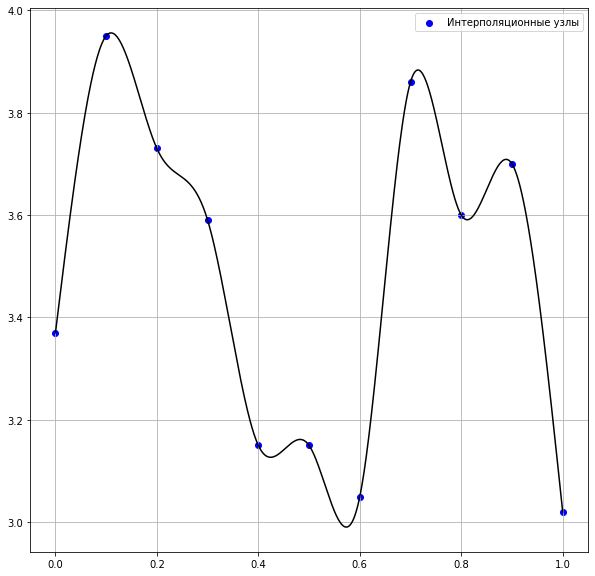

In [5]:
x = np.linspace(x_nodes[0], x_nodes[10], 1000)
y = [qubic_spline(x_nodes, x[i], res) for i in range (0, len(x))]
plt.subplots(figsize = (10, 10))
plt.plot(x, y, color = 'black')
plt.scatter(x_nodes, y_nodes, color = 'blue', label = 'Интерполяционные узлы')
plt.legend()
plt.grid()

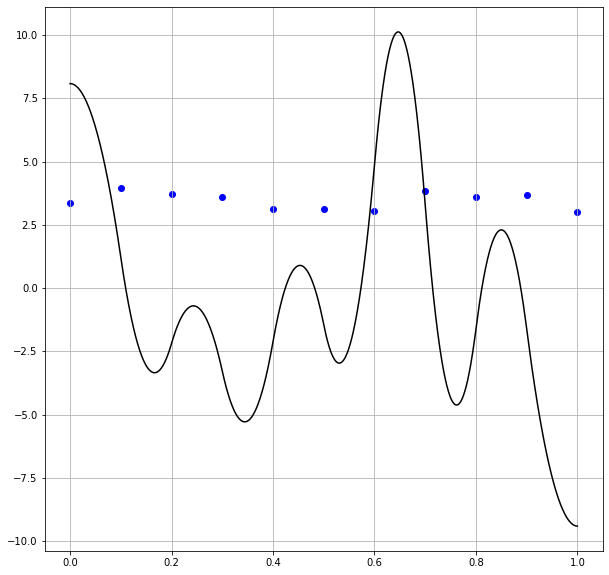

In [36]:
y = [d_qubic_spline(x_nodes, x[i], res) for i in range (0, len(x))]
plt.subplots(figsize = (10, 10))
plt.plot(x, y, color = 'black')
plt.scatter(x_nodes, y_nodes, color = 'blue', label = 'Интерполяционные узлы')
plt.grid()

In [49]:
def l_i(i, x, x_nodes):
    num = 1 
    den = 1
    for k in range (0, len(x_nodes)):
        if k == i:
          pass
        else:
          num = num * (x - x_nodes[k])

    for k in range (0, len(x_nodes)):
        if k == i:
          pass
        else:
          den = den * (x_nodes[i] - x_nodes[k])
    l = num / den
    return l


def L(x, x_nodes, y_nodes):
  L_a = 0
  for i in range (0,len(x_nodes)):
    L_a = L_a + l_i(i, x, x_nodes) * y_nodes[i]
  return L_a




In [38]:
vecs = [[0] * 11 for i in range (0,1000)]
for i in range (0,1000):
  for j in range (0, 11):
    vecs[i][j] = x_nodes[j] + np.random.normal(0, 0.01)
vecs = np.transpose(vecs)
vecs = np.array(vecs)






(1000, 11)
(1000, 1000)


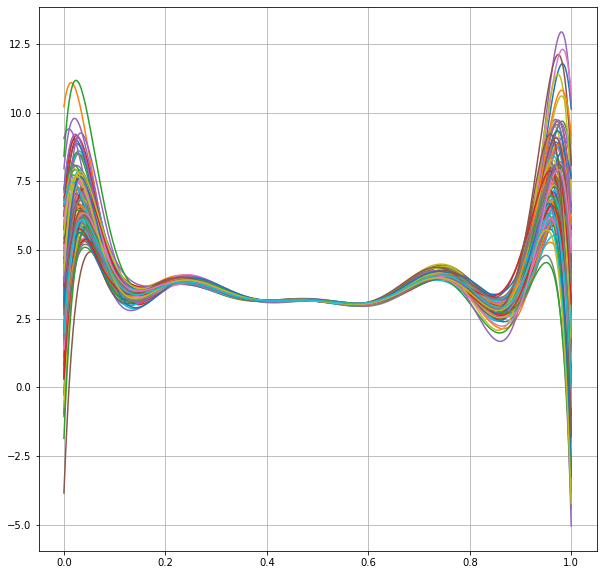

In [40]:
x_int = np.linspace(0, 1, 1000)
interp_lagr = [[L(x_int[i], vecs[: , j], y_nodes) for i in range (0, len(x_int))] for j in range (0, 1000)] 
interp_lagr = np.array(interp_lagr)
plt.subplots(figsize = (10, 10))
for i in range (0, 100):  
  plt.plot(x_int, interp_lagr[i , :])

plt.grid()

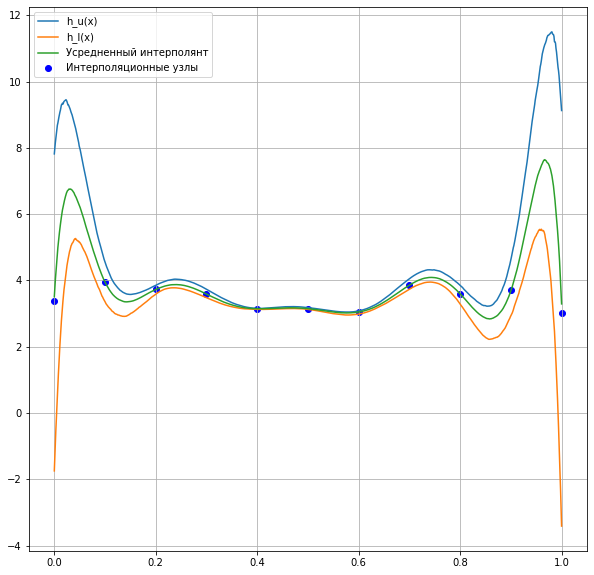

In [47]:
p_95 = [np.percentile(interp_lagr[:, i], 95) for i in range (0, 1000)]
p_5 = [np.percentile(interp_lagr[:, i], 5) for i in range (0, 1000)]
mean = [np.percentile(interp_lagr[:, i], 50) for i in range (0, 1000)]
plt.subplots(figsize = (10, 10))
 
plt.plot(x_int, p_95, label = "h_u(x)")
plt.plot(x_int, p_5, label = "h_l(x)")
plt.plot(x_int, mean, label = "Усредненный интерполянт")
plt.scatter(x_nodes, y_nodes, color = 'blue', label = 'Интерполяционные узлы')
plt.legend()
plt.grid()

In [63]:
vecs1 = [[0] * 11 for i in range (0,1000)]
for i in range (0,1000):
  for j in range (0, 11):
    vecs1[i][j] = y_nodes[j] + np.random.normal(0, 0.01)
vecs1 = np.transpose(vecs1)
vecs1 = np.array(vecs1)

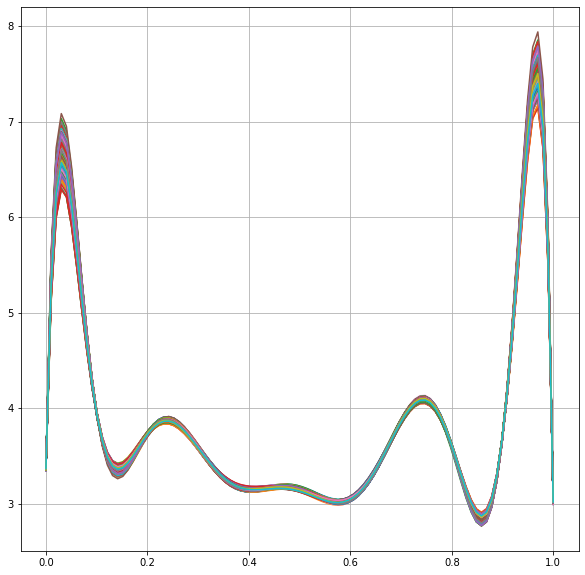

In [64]:
x_int = np.linspace(0, 1, 100)
interp_lagr = [[L(x_int[i], x_nodes, vecs1[: , j]) for i in range (0, len(x_int))] for j in range (0, 1000)] 
interp_lagr = np.array(interp_lagr)
plt.subplots(figsize = (10, 10))
for i in range (0, 1000):  
  plt.plot(x_int, interp_lagr[i , :])

plt.grid()

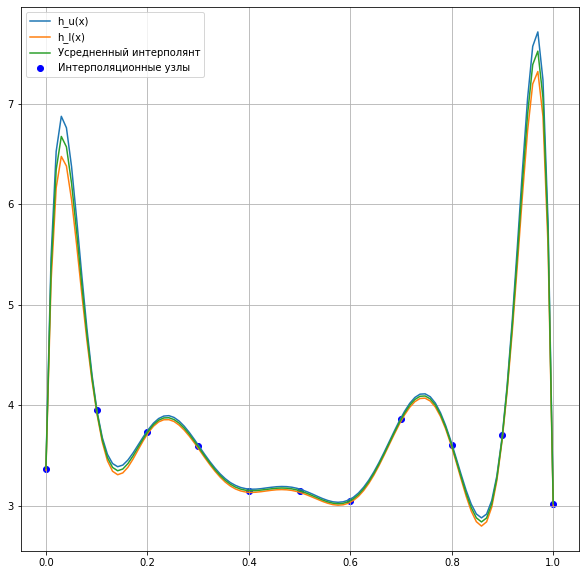

In [65]:
p_95 = [np.percentile(interp_lagr[:, i], 95) for i in range (0, 100)]
p_5 = [np.percentile(interp_lagr[:, i], 5) for i in range (0, 100)]
mean = [np.percentile(interp_lagr[:, i], 50) for i in range (0, 100)]
plt.subplots(figsize = (10, 10)) 
plt.plot(x_int, p_95, label = "h_u(x)")
plt.plot(x_int, p_5, label = "h_l(x)")
plt.plot(x_int, mean, label = "Усредненный интерполянт")
plt.scatter(x_nodes, y_nodes, color = 'blue', label = 'Интерполяционные узлы')
plt.legend()
plt.grid()

In [67]:
vecs_x_spl = [[0] * 11 for i in range (0,1000)]
for i in range (0,1000):
  for j in range (0, 11):
    vecs_x_spl[i][j] = x_nodes[j] + np.random.normal(0, 0.01)
vecs_x_spl = np.transpose(vecs_x_spl)
vecs_x_spl = np.array(vecs_x_spl)

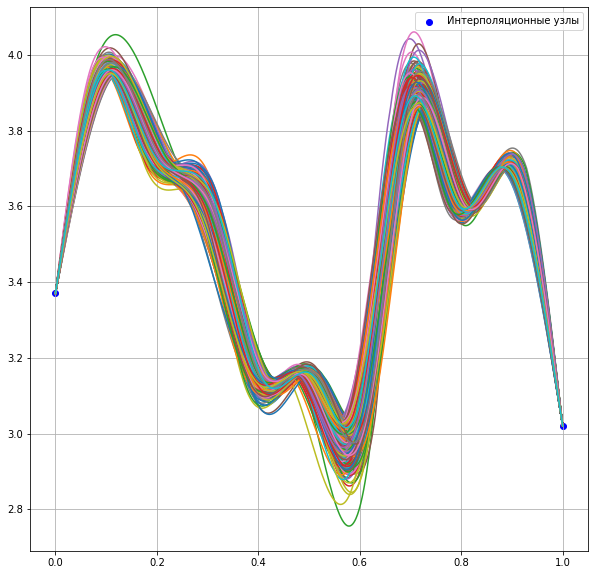

In [80]:
plt.subplots(figsize = (10, 10))

x_nod = np.linspace(x_nodes[0], x_nodes[10], 1000) 
for i in range (0, 1000):

  matrix = qubic_spline_coeff(vecs_x_spl[: , i], y_nodes)
  S = [qubic_spline(vecs_x_spl[: , i], x_nod[j], matrix) for j in range (0, len(x_nod))]
  plt.plot (x, S)

plt.scatter(x_nodes, y_nodes, color = 'blue', label = 'Интерполяционные узлы')
plt.legend()
plt.grid()


In [82]:
x_int = np.linspace(0, 1, 1000)
S_res = np.zeros((1000, len(x_int)))
for i in range (0, 1000):
  matrix = qubic_spline_coeff(vecs_x_spl[: , i], y_nodes)
  for j in range (0, len(x_int)):
    S_res[i, j]= qubic_spline(vecs_x_spl[:, i], x_int[j], matrix) 
print(np.shape(S_res))


(1000, 1000)


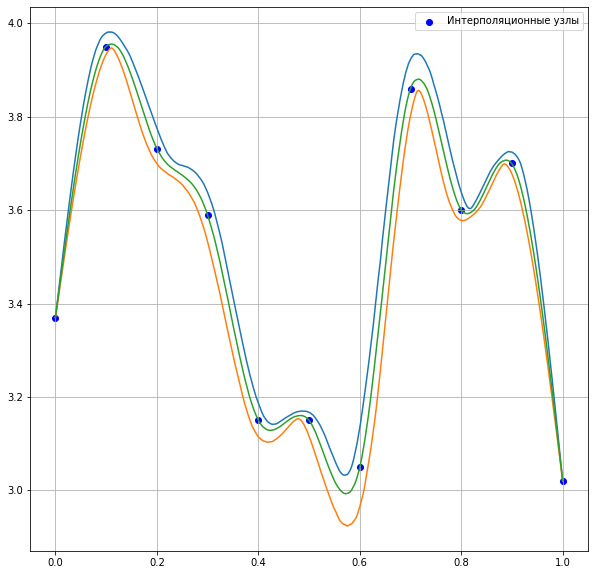

In [83]:
p_95 = [np.percentile(S_res[:, i], 95) for i in range (0, 1000)]
p_5 = [np.percentile(S_res[:, i], 5) for i in range (0, 1000)]
mean = [np.percentile(S_res[:, i], 50) for i in range (0, 1000)]
plt.subplots(figsize = (10, 10))
 
plt.plot(x_int, p_95)
plt.plot(x_int, p_5)
plt.plot(x_int, mean)
plt.scatter(x_nodes, y_nodes, color = 'blue', label = 'Интерполяционные узлы')
plt.legend()
plt.grid()


In [27]:
vecs_y_spl = [[0] * 11 for i in range (0,1000)]
for i in range (0,1000):
  for j in range (0, 11):
    vecs_y_spl[i][j] = y_nodes[j] + np.random.normal(0, 0.01) #y_nodes with errors 
vecs_y_spl = np.transpose(vecs_y_spl)
vecs_y_spl = np.array(vecs_y_spl)
print(np.shape(vecs_y_spl))

(11, 1000)


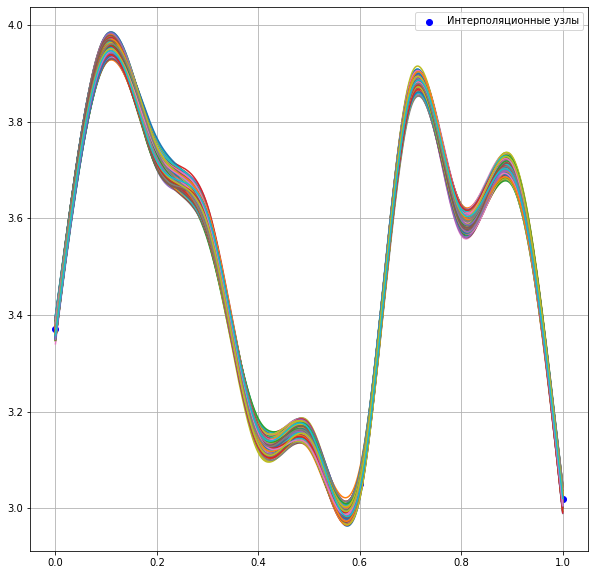

In [84]:
plt.subplots(figsize = (10, 10))

x_nod = np.linspace(x_nodes[0], x_nodes[10], 1000)
for i in range (0, 1000):
  matrix = qubic_spline_coeff(x_nodes, vecs_y_spl[:, i])
  S = [qubic_spline(x_nodes, x_nod[j], matrix) for j in range (0, len(x_nod))]
  plt.plot (x, S)

plt.scatter(x_nodes, y_nodes, color = 'blue', label = 'Интерполяционные узлы')
plt.legend()
plt.grid()


In [29]:
x_int = np.linspace(0, 1, 1000)
S_res1 = np.zeros((1000, len(x_int)))
for i in range (0, 1000):
  matrix = qubic_spline_coeff(x_nodes, vecs_y_spl[:, i])
  for j in range (0, len(x_int)):
    S_res1[i, j] = qubic_spline(x_nodes, x_int[j], matrix)

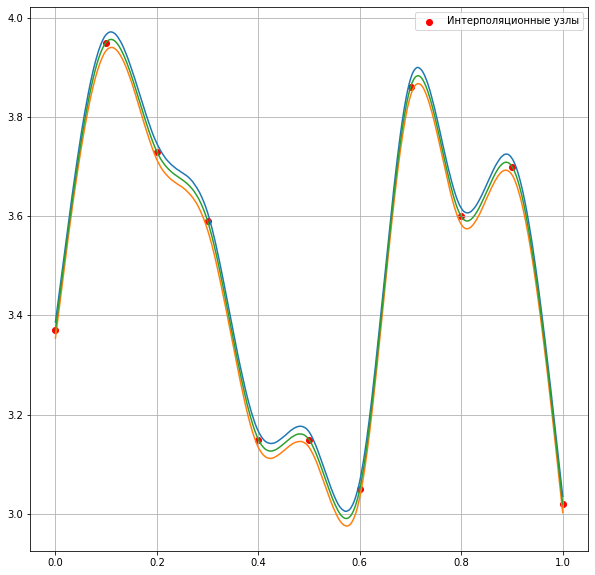

In [85]:
p_95 = [np.percentile(S_res1[:, i], 95) for i in range (0, 1000)]
p_5 = [np.percentile(S_res1[:, i], 5) for i in range (0, 1000)]
mean = [np.percentile(S_res1[:, i], 50) for i in range (0, 1000)]
plt.subplots(figsize = (10, 10))
 
plt.plot(x_int, p_95)
plt.plot(x_int, p_5)
plt.plot(x_int, mean)
plt.scatter(x_nodes, y_nodes, color = 'red', label = 'Интерполяционные узлы')
plt.legend()
plt.grid()
